In [27]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../graph_farms')
sys.path.append('../')
from generate_graphs import generate_graphs
from gnn_framework.data import GraphFarmsDataset
from plotting import plot_vs_x
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# generate some data for a single wind farm layout and multiple inflows for both load models with one wind speed and ti (testing directions)
generate_graphs(config_path='../graph_farms/config.yml', num_layouts=2, num_inflows=300, dset_path='./loads_model_test', 
                num_threads=1, connectivity='delaunay', loads_model='OneWT', fixed_ti=5, fixed_wd=None)


1/1 [==============================] - 0s 37ms/step
Finished generating 600 graphs (2 layouts x 300 inflows)!


In [29]:
onewt_dataset = GraphFarmsDataset(root_path='./loads_model_test/OneWT/delaunay')
onewt_loader = DataLoader(onewt_dataset, batch_size=1, shuffle=False)
onewt_data = []
for i_batch, data in enumerate(onewt_loader):
        onewt_data += [data.y]
        
twowt_dataset = GraphFarmsDataset(root_path='./loads_model_test/TwoWT/delaunay')
twowt_loader = DataLoader(twowt_dataset, batch_size=1, shuffle=False)
twowt_data = []
for i_batch, data in enumerate(twowt_loader):
        twowt_data += [data.y]

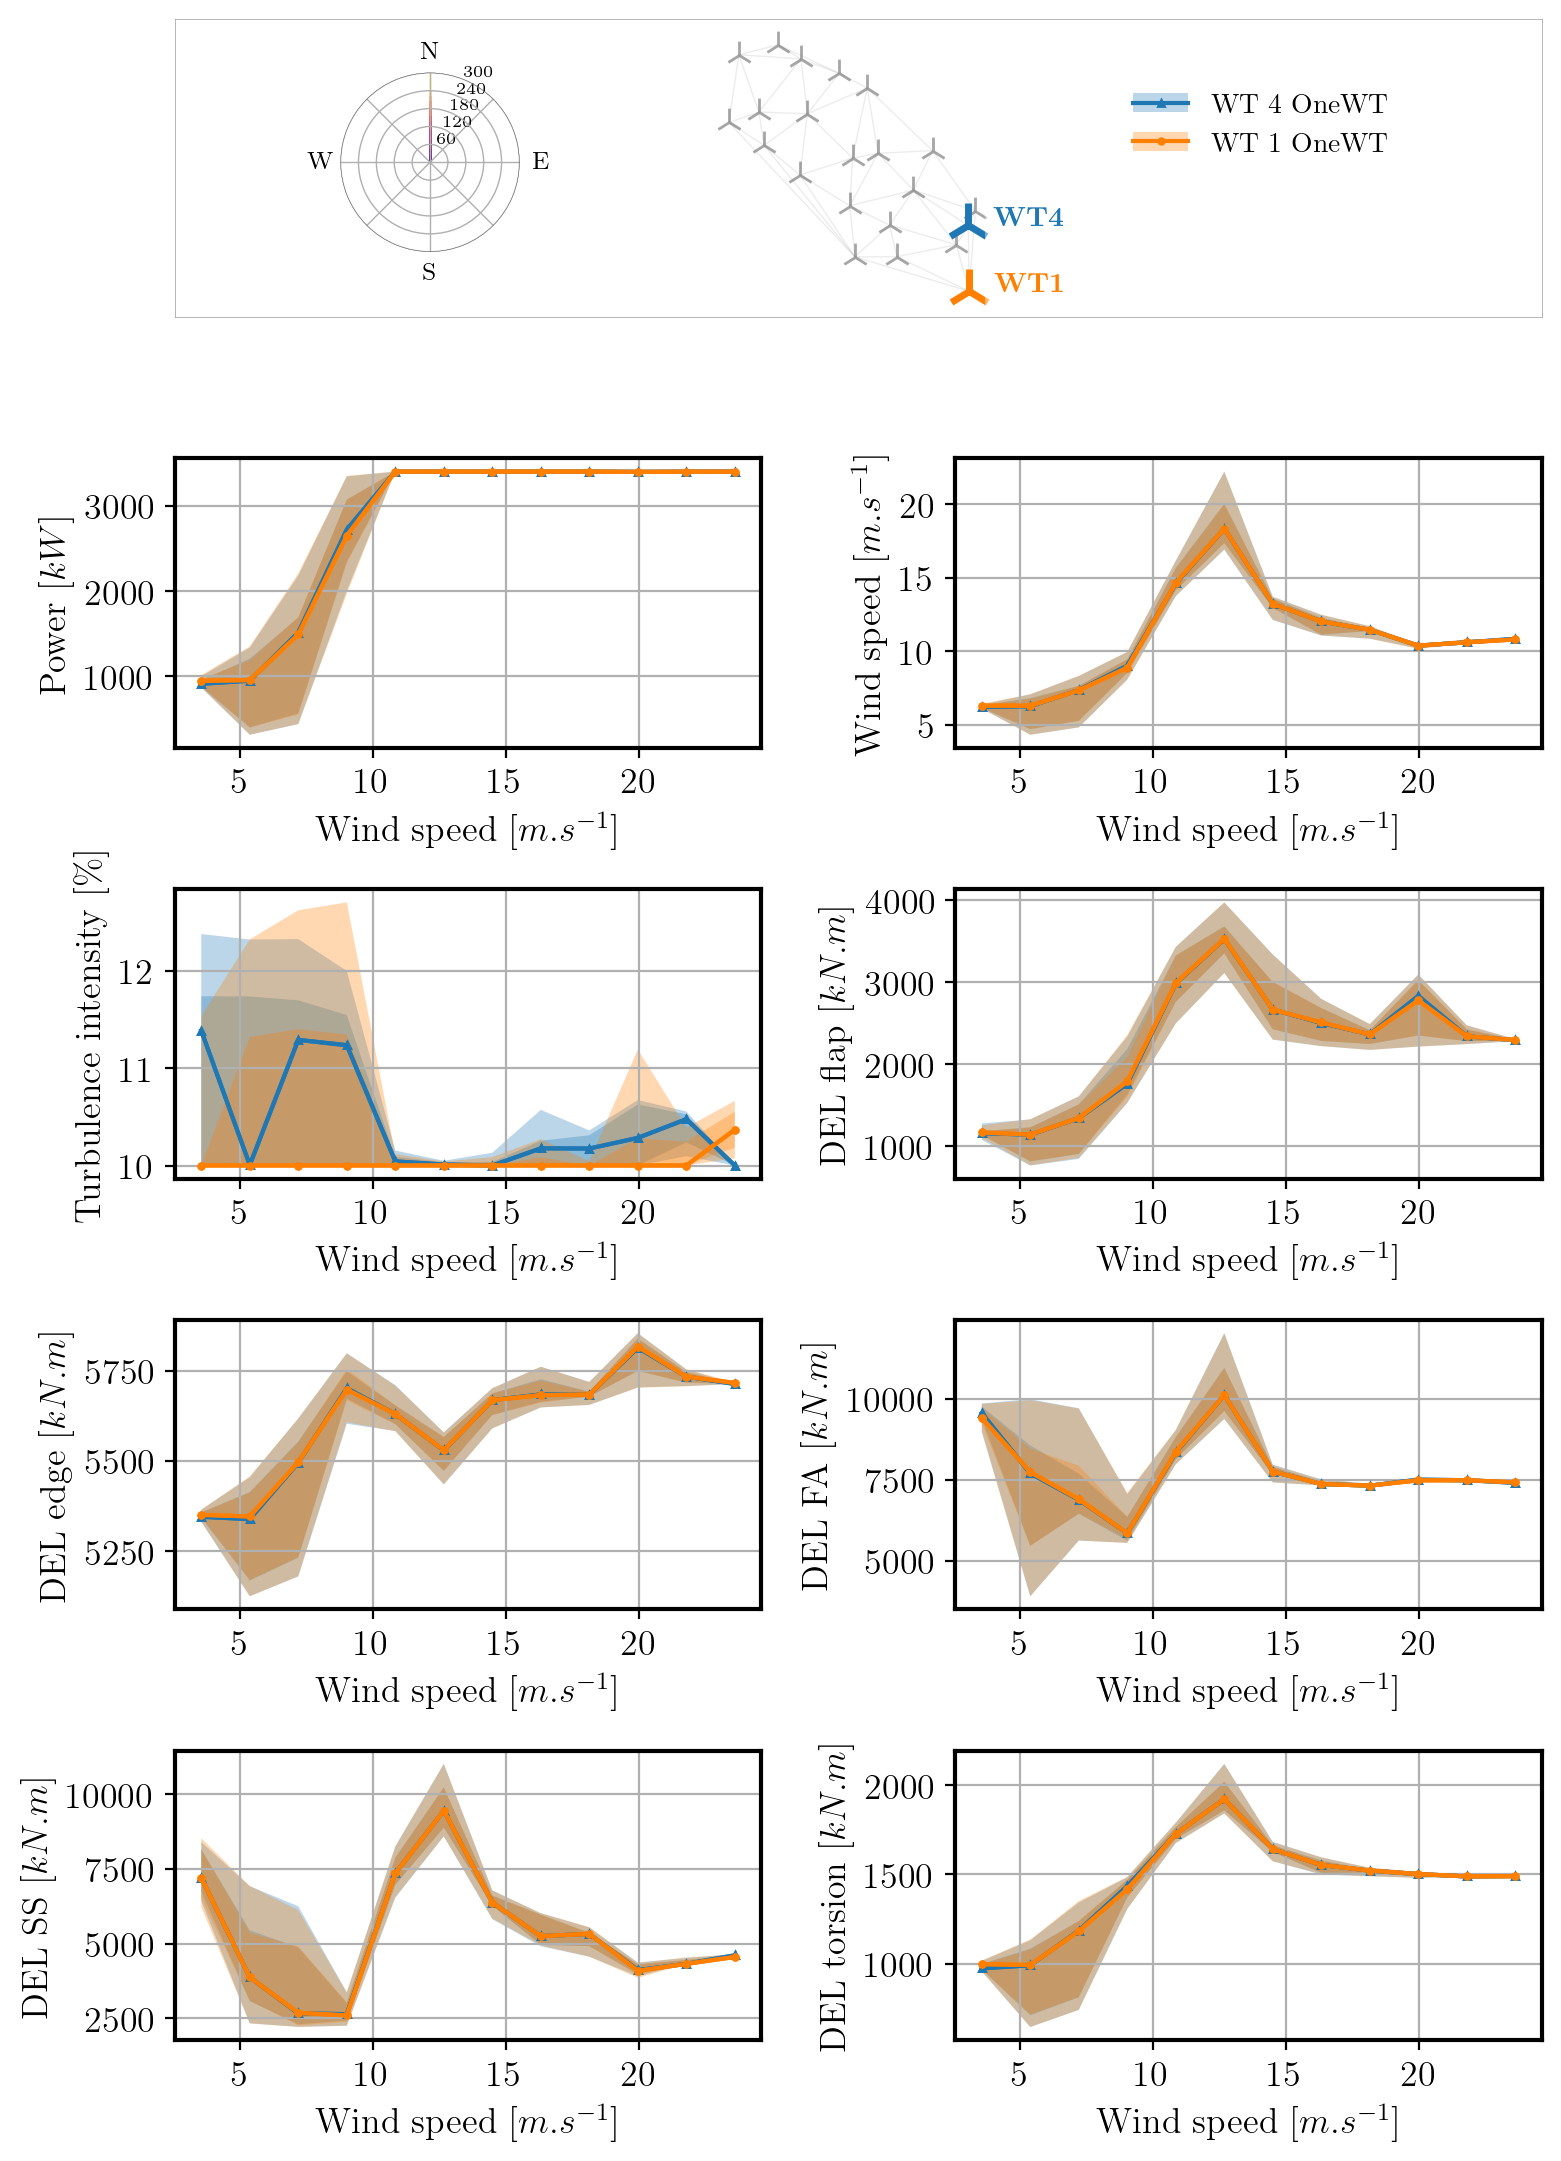

In [47]:
plot_vs_x(dataset=twowt_dataset, y=onewt_data, y_pred=None, layout_idx=0, x_axis='ws', turb=[3, 0], num_inflows_per_layout=300, dpi=200, show_farm=True,
          labels=['OneWT'])
plt.show()

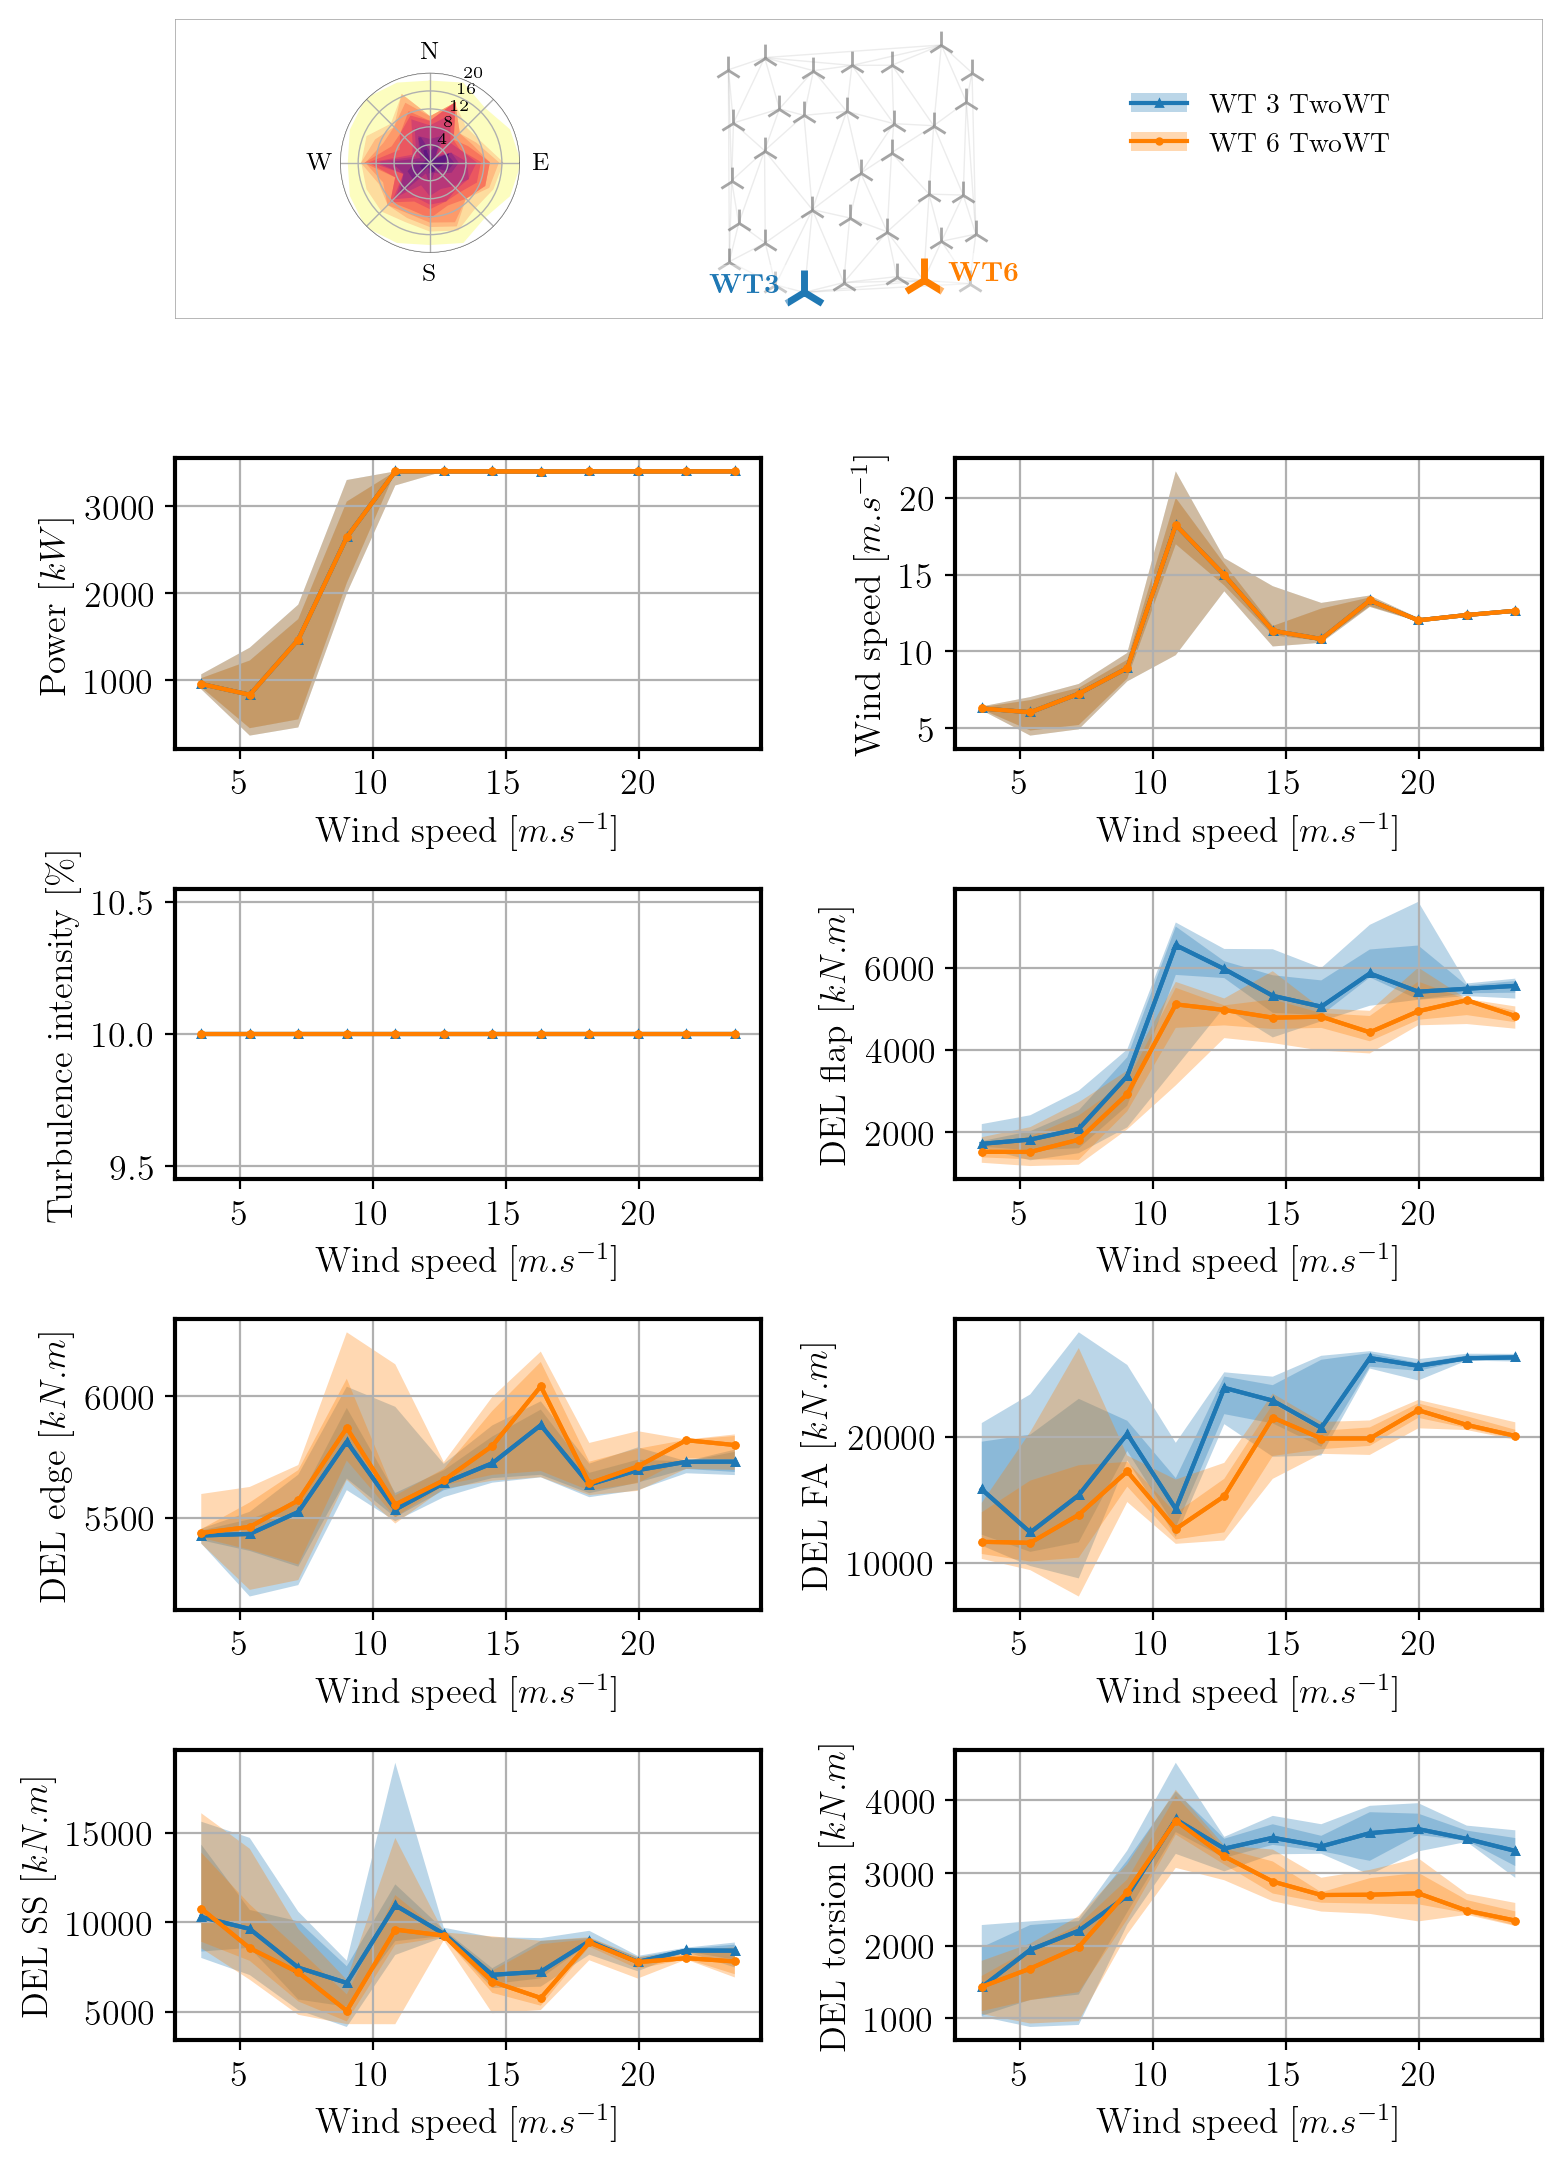

In [36]:
plot_vs_x(dataset=onewt_dataset, y=twowt_data, y_pred=None, layout_idx=0, x_axis='ws', turb=[2, 5], num_inflows_per_layout=300, dpi=200, show_farm=True,
          labels=['TwoWT'])
plt.show()

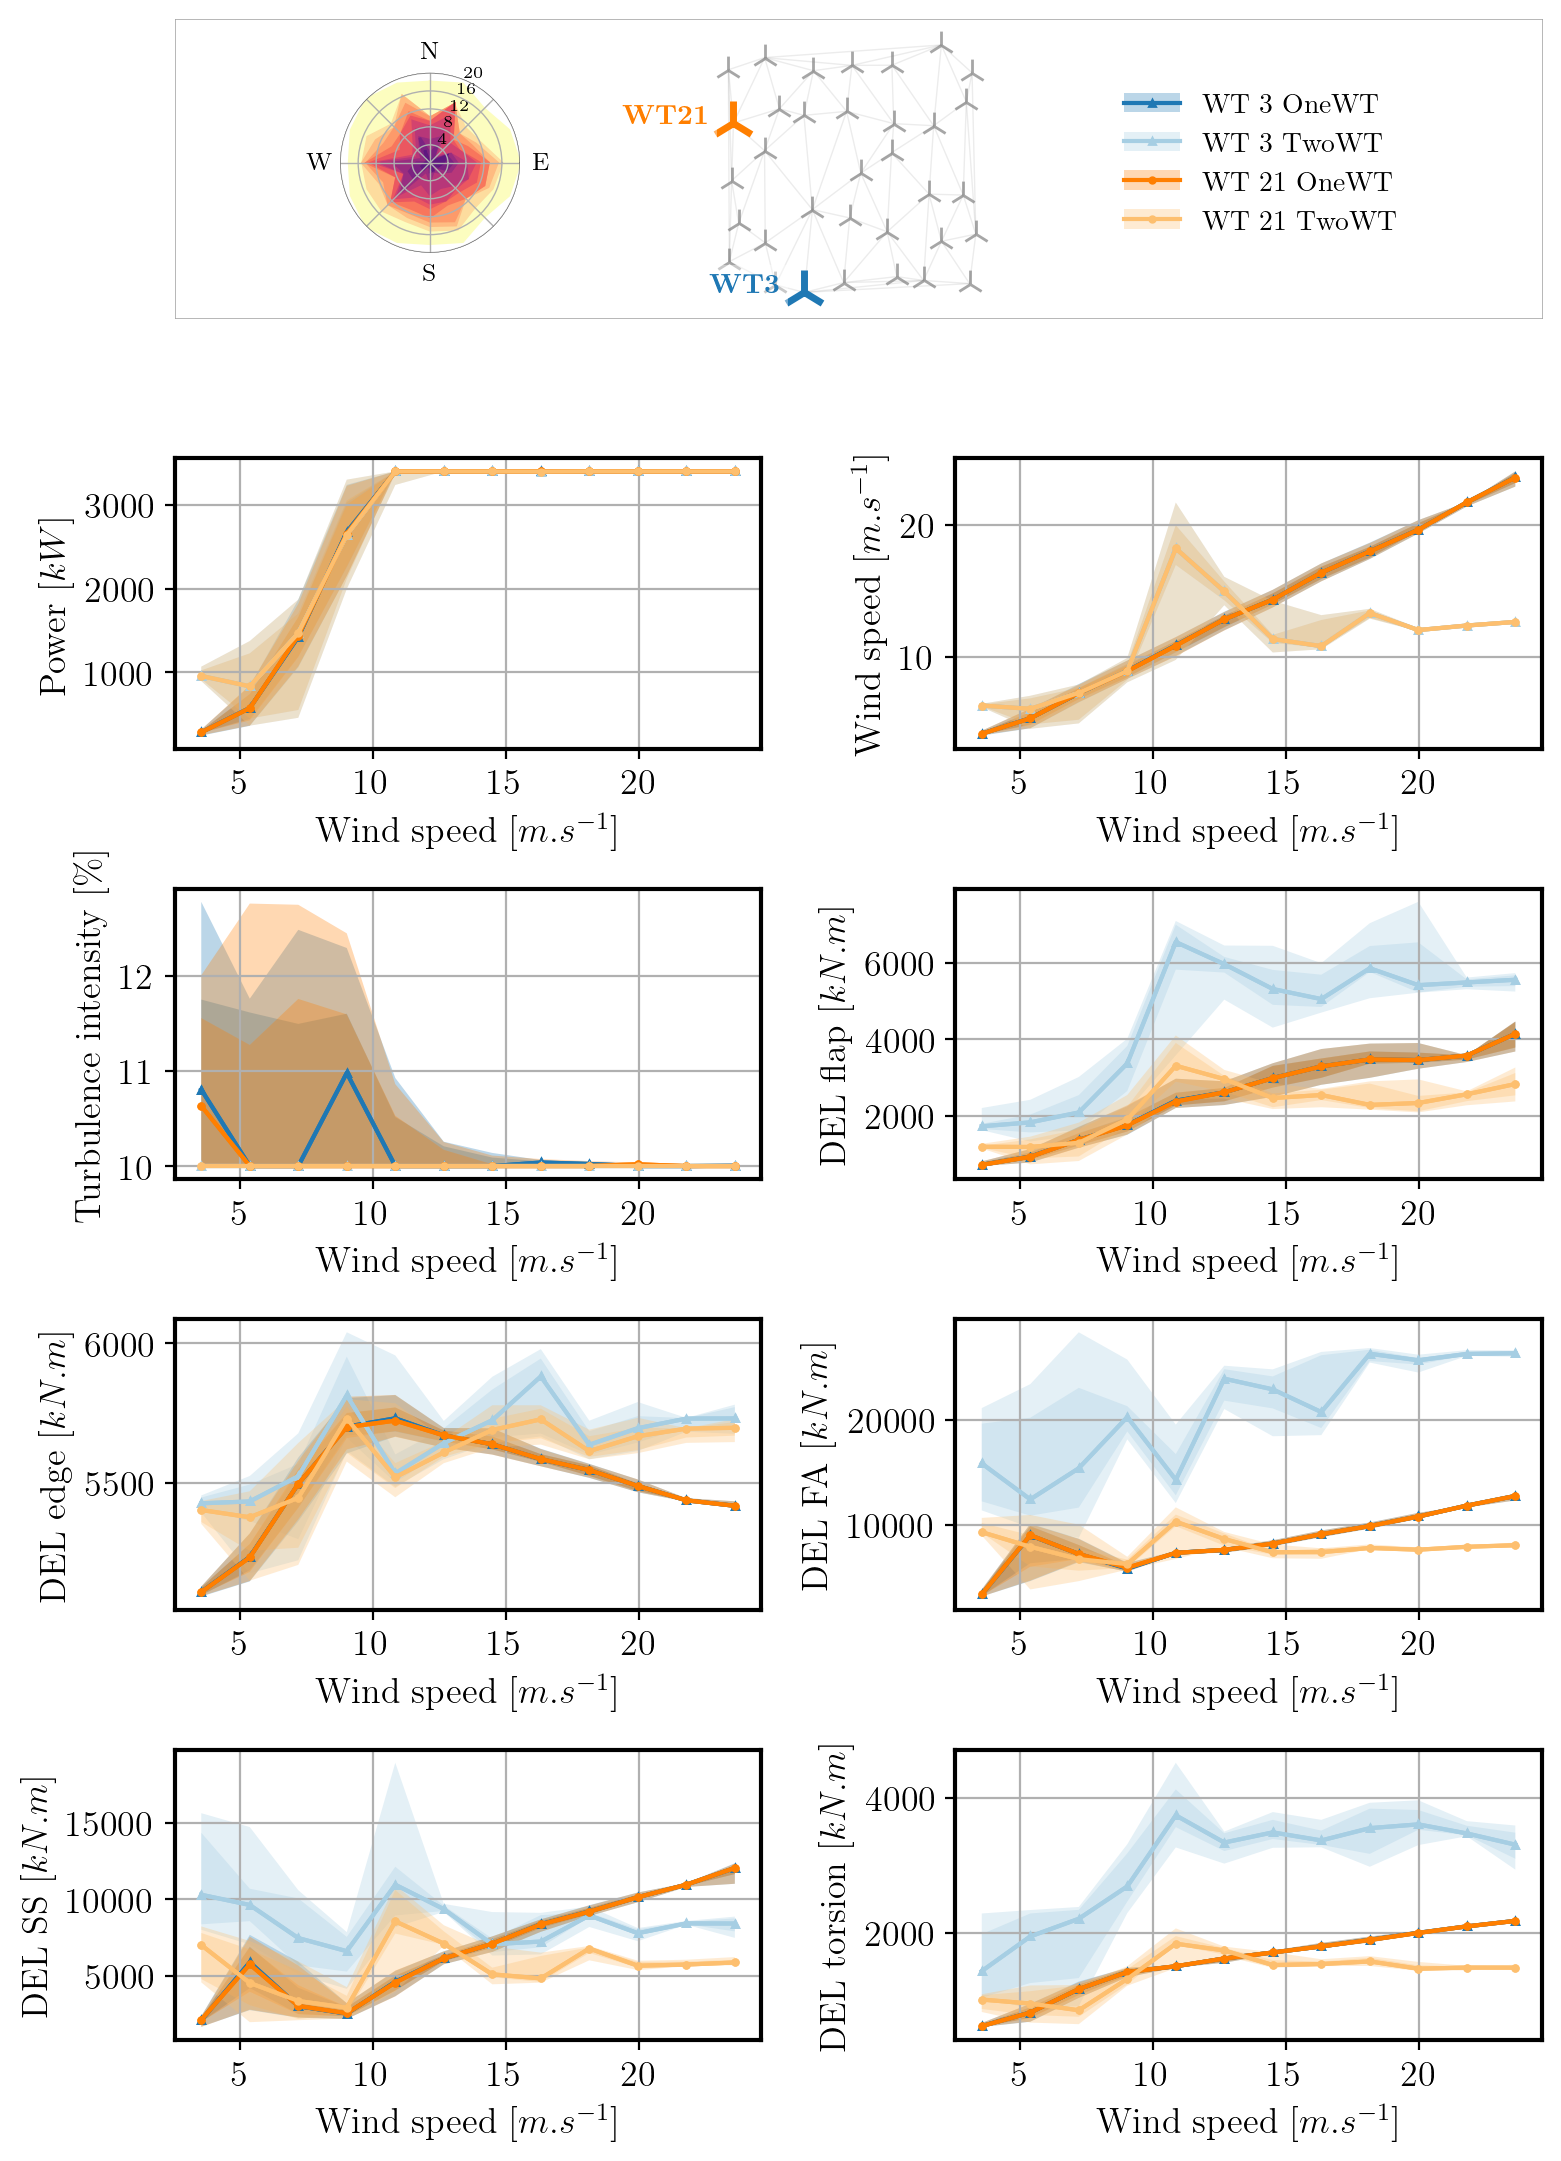

In [35]:
plot_vs_x(dataset=onewt_dataset, y=onewt_data, y_pred=twowt_data, layout_idx=0, x_axis='ws', turb=[2, 20], num_inflows_per_layout=300, dpi=200, show_farm=True,
          labels=['OneWT', 'TwoWT'])
plt.show()